# Stroke Prediction Dataset

In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt 
import numpy as np  
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import roc_curve,auc
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns

## Describing the dataset
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### Features Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv", index_col=0)
display(data.head())
print("rows, columns:", data.shape)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


rows, columns: (5110, 11)


In total, there are 5510 rows in the raw data...

## Exploring and pre-processing
Let's check if if there are some empty values in the dataset. 

In [3]:
missing_values = data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


The output above shows that there are some missing values in the bmi column. Lets remove these rows from the dataset, so we can have a look at the summary and statistics of the numerical data. 

In [4]:
data = data.dropna()
num_data = data.select_dtypes(include='number')
display(num_data.head())
display(num_data.describe())
cat_data = data.select_dtypes(include='object')
display(cat_data.head())

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,,,,,,
9046,67.0,0,1,228.69,36.6,1
31112,80.0,0,1,105.92,32.5,1
60182,49.0,0,0,171.23,34.4,1
1665,79.0,1,0,174.12,24.0,1
56669,81.0,0,0,186.21,29.0,1


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


,gender,ever_married,work_type,Residence_type,smoking_status
id,,,,,
9046,Male,Yes,Private,Urban,formerly smoked
31112,Male,Yes,Private,Rural,never smoked
60182,Female,Yes,Private,Urban,smokes
1665,Female,Yes,Self-employed,Rural,never smoked
56669,Male,Yes,Private,Urban,formerly smoked


Based on the output of the previous results, the numerical data needs some pre-processing. E.g. The columns age and avg_glucose_level have some big standard deviations due to outliers. Additionally, the hypertension, heart_disease and stroke columns are no quantitative features, but qualitative, which should not be shown in the describe function, nor go through outlier filtering.

In [5]:
columns=["hypertension", "heart_disease", "stroke"]
cat_data = pd.merge(cat_data, num_data[columns], on='id')
cat_data.head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke
id,,,,,,,,
9046,Male,Yes,Private,Urban,formerly smoked,0,1,1
31112,Male,Yes,Private,Rural,never smoked,0,1,1
60182,Female,Yes,Private,Urban,smokes,0,0,1
1665,Female,Yes,Self-employed,Rural,never smoked,1,0,1
56669,Male,Yes,Private,Urban,formerly smoked,0,0,1


In [6]:
num_data = num_data.drop(columns=columns)
display(num_data.describe())

,age,avg_glucose_level,bmi
count,4909.000000,4909.000000,4909.000000
mean,42.865374,105.305150,28.893237
std,22.555115,44.424341,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.070000,23.500000
50%,44.000000,91.680000,28.100000
75%,60.000000,113.570000,33.100000
max,82.000000,271.740000,97.600000


In [7]:
#  Removing the outliers in the data. We will only keep values that lay within 3 standard deviations from the mean.
# Get Z-scores for specific columns
zscores=stats.zscore(num_data)
# Absolute values
abs_zcores=abs(zscores)
# Is Z-score < 3
filtered_zscore=abs_zcores<3
# Get a True if all collumns of a row have z-scores <3, else: False
filtered = filtered_zscore.all(axis=1)
# Only keep these rows
num_data = num_data[filtered]
num_data.describe()

,age,avg_glucose_level,bmi
count,4792.000000,4792.000000,4792.000000
mean,42.556995,103.329631,28.501336
std,22.600203,41.423369,7.149869
min,0.080000,55.120000,10.300000
25%,24.000000,76.777500,23.500000
50%,44.000000,91.210000,27.900000
75%,60.000000,112.315000,32.800000
max,82.000000,238.530000,52.300000


This filtering brings the data down to 4701 rows. Note that we started on 5110 rows. Lets merge the numerical date, and categorical date back together. 

In [8]:
data = pd.merge(cat_data, num_data, on='id')

In [9]:
display(data.head())
print(data.shape)

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke,age,avg_glucose_level,bmi
id,,,,,,,,,,,
9046,Male,Yes,Private,Urban,formerly smoked,0,1,1,67.0,228.69,36.6
31112,Male,Yes,Private,Rural,never smoked,0,1,1,80.0,105.92,32.5
60182,Female,Yes,Private,Urban,smokes,0,0,1,49.0,171.23,34.4
1665,Female,Yes,Self-employed,Rural,never smoked,1,0,1,79.0,174.12,24.0
56669,Male,Yes,Private,Urban,formerly smoked,0,0,1,81.0,186.21,29.0


(4792, 11)


Now that the outliers are removed, let's take a look at the correlations. 

<Axes: >

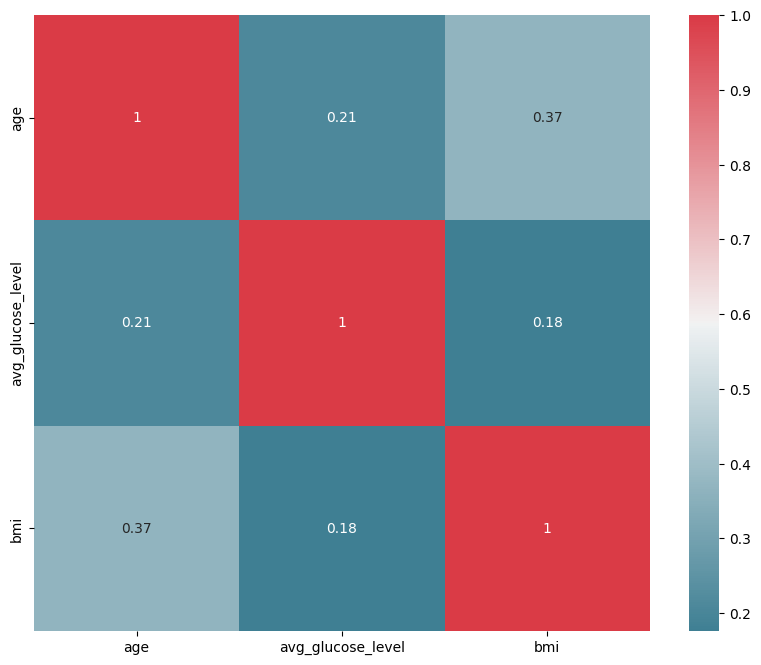

In [10]:
import seaborn as sns
# Visualize correlations
f, ax = plt.subplots(figsize=(10, 8))
corr = num_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

CPU times: user 1.53 s, sys: 308 ms, total: 1.83 s
Wall time: 1.39 s


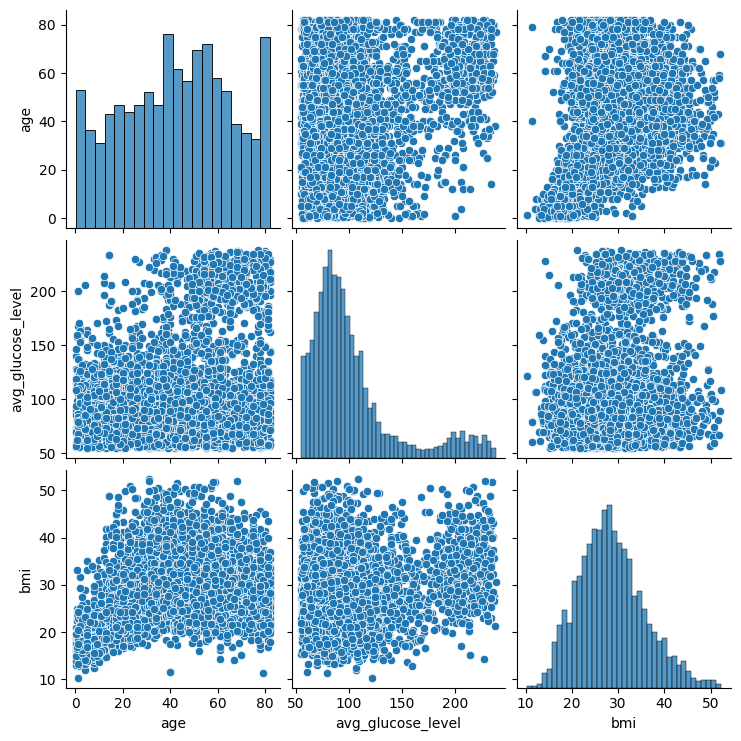

In [11]:
%%time
sns.pairplot(num_data);

## Regression
Let's test our first model to have a benchmark score, so the model can further imporove using other pre-processing steps and other algorithms. Since Linear Regression does not work with a binary prediction target, a Logistic Regression will be performed.  

In [14]:
display(data.head())
print("rows, columns: ", data.shape)

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke,age,avg_glucose_level,bmi
id,,,,,,,,,,,
9046,Male,Yes,Private,Urban,formerly smoked,0,1,1,67.0,228.69,36.6
31112,Male,Yes,Private,Rural,never smoked,0,1,1,80.0,105.92,32.5
60182,Female,Yes,Private,Urban,smokes,0,0,1,49.0,171.23,34.4
1665,Female,Yes,Self-employed,Rural,never smoked,1,0,1,79.0,174.12,24.0
56669,Male,Yes,Private,Urban,formerly smoked,0,0,1,81.0,186.21,29.0


rows, columns:  (4792, 11)


In [15]:
X = data.drop("stroke",axis=1)
X = pd.get_dummies(X)
y = data["stroke"]
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

       hypertension  heart_disease   age  avg_glucose_level   bmi  \
id                                                                  
9046              0              1  67.0             228.69  36.6   
31112             0              1  80.0             105.92  32.5   
60182             0              0  49.0             171.23  34.4   
1665              1              0  79.0             174.12  24.0   
56669             0              0  81.0             186.21  29.0   
...             ...            ...   ...                ...   ...   
14180             0              0  13.0             103.08  18.6   
44873             0              0  81.0             125.20  40.0   
19723             0              0  35.0              82.99  30.6   
37544             0              0  51.0             166.29  25.6   
44679             0              0  44.0              85.28  26.2   

       gender_Female  gender_Male  gender_Other  ever_married_No  \
id                                

In [16]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)
model.score(X_test,y_test)

[0 0 0 ... 0 0 0]


0.9576877234803337